# Exercise sheet 10

## Exercise 1
What is the mathematical connection between PCA and classical MDS? When do you get a dif-ferent result from both methods and when the same result?

PCA and Classical MDS both make use of eigenvalue decomposition but are applied to different matrices of the data. PCA aims to maximize variance while reducing the dimensionality whereas MDS uses a distance matrix targetted to preserve pairwise distances. They give the s result when using euclidean distances on centered data. Are the distances non-euclidean or the data is un-centered PCA and MDS are different

## Exercise 2
To prove that the solution to the optimization problem
$$
\begin{array}{ll}
\max _{x \in \mathbb{R}^d} & x^{\top} A x \\
\text { subject to } & \|x\|_2=1
\end{array}
$$
is given by the eigenvector corresponding to the largest eigenvalue of the symmetric matrix $A \in$ $\mathbb{R}^{d \times d}$, we will use the spectral theorem and properties of Rayleigh quotients.

Spectral Theorem
Since $A$ is a symmetric matrix, the spectral theorem guarantees that $A$ can be diagonalized by an orthogonal matrix. Specifically, there exists an orthogonal matrix $Q$ and a diagonal matrix $\Lambda$ such that: $\square$
$$
A=Q \Lambda Q^{\top}
$$
where $Q=\left[q_1, q_2, \ldots, q_d\right]$ is a matrix whose columns are the eigenvectors of $A$, and $\Lambda=$ $\operatorname{diag}\left(\lambda_1, \lambda_2, \ldots, \lambda_d\right)$ is a diagonal matrix containing the eigenvalues of $A$.

Rayleigh Quotient
For any vector $x \in \mathbb{R}^d$ with $\|x\|_2=1$, the quadratic form $x^{\top} A x$ can be expressed in terms of the eigenvalues and eigenvectors of $A$ as follows:
$$
x^{\top} A x=x^{\top}\left(Q \Lambda Q^{\top}\right) x=\left(Q^{\top} x\right)^{\top} \Lambda\left(Q^{\top} x\right)
$$

Let $y=Q^{\top} x$. Since $Q$ is an orthogonal matrix, $\|y\|_2=\|x\|_2=1$. Thus, we can write:
$$
x^{\top} A x=y^{\top} \Lambda y=\sum_{i=1}^d \lambda_i y_i^2
$$
where $y=\left[y_1, y_2, \ldots, y_d\right]^{\top}$.
Maximizing the Rayleigh Quotient
The expression $\sum_{i=1}^d \lambda_i y_i^2$ is a weighted sum of the eigenvalues of $A$ with the weights being $y_i^2$, which are non-negative and sum to 1 (since $\|y\|_2=1$ ).

To maximize this expression, we should place as much weight as possible on the largest eigenvalue $\lambda_{\max }$. This occurs when $y$ is such that all the weight is on the component corresponding to $\lambda_{\max }$. Specifically, this happens when $y_i=0$ for all $i$ except for the index $i$ corresponding to $\lambda_{\max }$. Without loss of generality, assume $\lambda_{\max }=\lambda_1$, then $y=[1,0, \ldots, 0]^{\top}$.

Corresponding Eigenvector
If $y=[1,0, \ldots, 0]^{\top}$, then $x=Q y=Q[1,0, \ldots, 0]^{\top}=q_1$, where $q_1$ is the eigenvector of $A$ corresponding to the largest eigenvalue $\lambda_1$.

## Exercise 3

Project the different data into two dimensions using PCA and MDR and compare.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


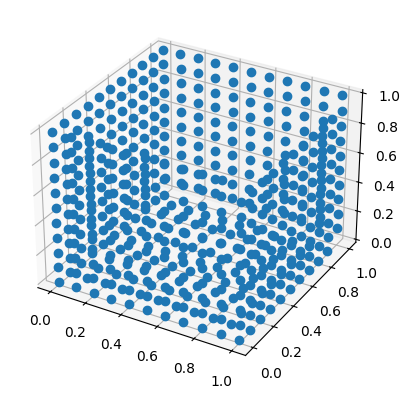

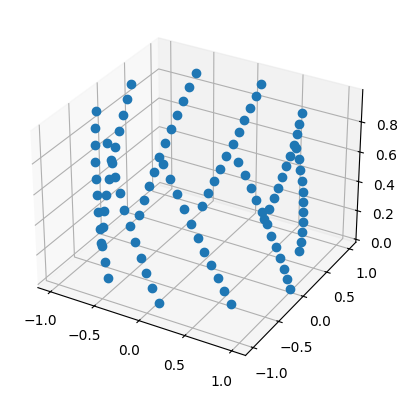

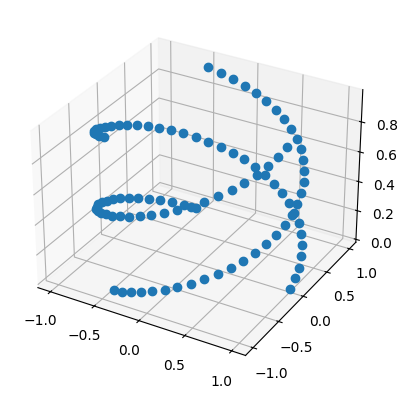

In [3]:
X = np.load('./box.npy')
plt.figure().add_subplot(111, projection = '3d').plot(*X.T, 'o')
plt.show()


X = np.load('./spring_1.npy')
plt.figure().add_subplot(111, projection = '3d').plot(*X.T, 'o')
plt.show()


X = np.load('./spring_2.npy')
plt.figure().add_subplot(111, projection = '3d').plot(*X.T, 'o')
plt.show()

In [23]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import MDS

def compareProjections(X):
    # Step 2: Apply PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(X)

    # Step 3: Apply MDS
    mds = MDS(n_components=2, random_state=42)
    mds_result = mds.fit_transform(X)

    # Step 4: Plot the Results
    plt.figure(figsize=(12, 6))
    fig, (pca_ax, mds_ax) = plt.subplots(2)


    # Plot PCA Result
    pca_ax.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', marker='o')
    pca_ax.set_title('PCA Projection')
    pca_ax.set_xlabel('Component 1')
    pca_ax.set_ylabel('Component 2')

    # Plot MDS Result
    mds_ax.scatter(mds_result[:, 0], mds_result[:, 1], c='red', marker='o')
    mds_ax.set_title('MDS Projection')
    mds_ax.set_xlabel('Dimension 1')
    mds_ax.set_ylabel('Dimension 2')

    fig.tight_layout()
    plt.show()


<Figure size 1200x600 with 0 Axes>

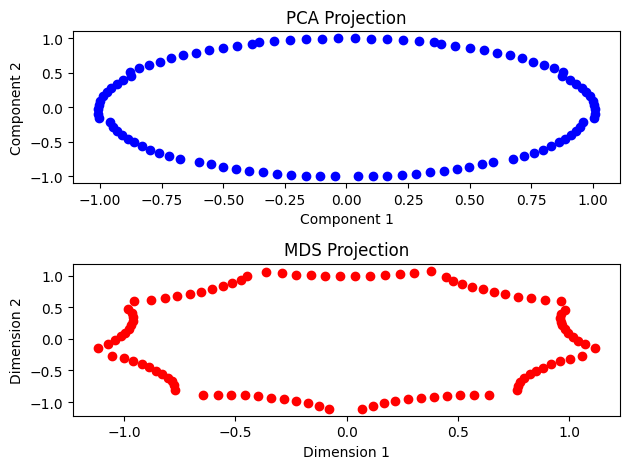

<Figure size 1200x600 with 0 Axes>

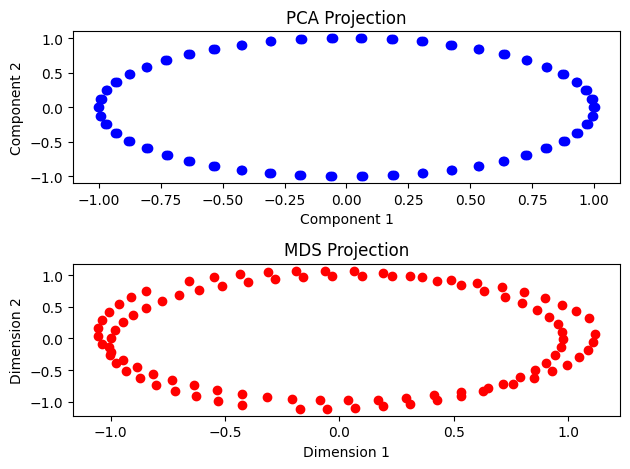

<Figure size 1200x600 with 0 Axes>

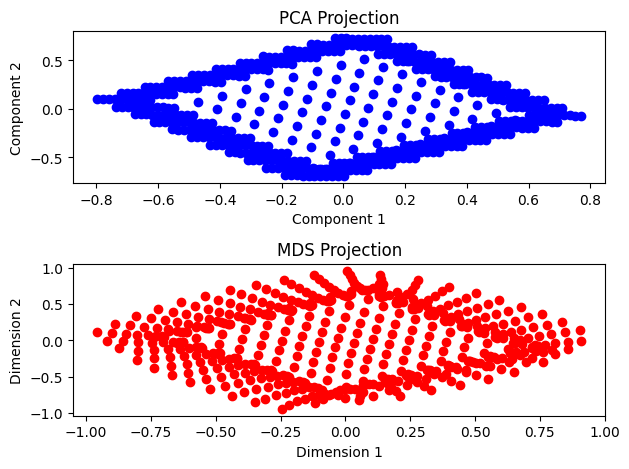

In [25]:
compareProjections(X = np.load('./spring_1.npy'))
compareProjections(X = np.load('./spring_2.npy'))
compareProjections(X = np.load('./box.npy'))